In [2]:
import loompy
import numpy as np
import pandas as pd


from dfply import *

### from ggplot import *
from plotnine import *

# import matplotlib

### Make sure you use the Python 3 (py3_anaconda3_PT180510) environment
# import sys
# print(sys.executable) # /tools/anaconda/3-4.4.0/envs/py3_anaconda3_PT180510/bin/python
# print(sys.version) # 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) [GCC 7.2.0]

In [3]:
!ls

explore_and_export_mousebrain_loom_agg.ipynb
explore_mousebrain.R
export_mousebrain_ctc_log_avg_data.ipynb
export_mousebrain_loom.ipynb
import_mousebrain_to_seurat.R
mousebrain_anova.ipynb
mousebrain_beta.ipynb
mousebrain_ges.ipynb
mousebrain-SEM_models-old_workflow.R
mousebrain-SEM_models.R
mousebrain-SEM_models-skene_quick_and_dirty.R


### Coonect to loompy

In [4]:
file_loom = "/data/pub-others/zeisel-biorxiv-2018/data/L5_All.agg.loom"
ds = loompy.connect(file_loom)

### Export (move this to section another place?)

In [6]:
numpy_data = ds[:,:] # get data as numpy_array

In [7]:
column_names = ["{}_{}".format(a_, b_) for a_, b_ in zip(ds.ca.Class.tolist(), ds.ca.ClusterName.tolist())]
column_names[1:5]

['Neurons_ENT8', 'Neurons_ENT6', 'Neurons_ENT5', 'Neurons_ENT4']

In [8]:
row_names = ds.ra.Gene
row_names[1:5]

array(['Ptchd2', 'P2rx2', 'Ptger4', 'Fam19a1'], dtype='<U14')

In [9]:
df_export = pd.DataFrame(data=numpy_data, columns=column_names, index=row_names)
df_export.head()

,Neurons_ENT9,Neurons_ENT8,Neurons_ENT6,Neurons_ENT5,Neurons_ENT4,Neurons_ENT7,Neurons_ENT3,Neurons_ENT2,Neurons_ENT1,PeripheralGlia_ENTG1,...,Neurons_PSPEP8,Neurons_PSNF2,Neurons_PSNF3,Neurons_PSNF1,Neurons_PSNP1,Neurons_PSNP3,Neurons_PSNP2,Neurons_PSNP5,Neurons_PSNP4,Neurons_PSNP6
Cbln2,13.976331,0.422680,0.127119,0.084942,0.038710,0.000000,0.006452,0.018692,0.071429,0.012270,...,0.000000,2.245614,0.193548,3.026316,0.273050,0.000000,0.000000,0.011364,0.000000,0.007576
Ptchd2,0.390533,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.009346,0.000000,0.000000,...,0.071429,0.105263,0.096774,0.105263,0.000000,0.003704,0.097222,0.011364,0.000000,0.007576
P2rx2,7.609467,1.381443,0.186441,0.517375,0.412903,1.322581,1.219355,1.373832,1.714286,0.006135,...,0.035714,0.000000,0.000000,0.000000,0.010638,0.003704,0.000000,0.238636,0.022222,1.590909
Ptger4,0.928994,0.092784,0.194915,0.127413,0.148387,0.193548,0.070968,0.214953,0.142857,0.000000,...,0.000000,0.122807,0.161290,0.052632,0.042553,0.040741,0.055556,0.079545,0.155556,0.159091
Fam19a1,8.739645,9.000000,3.601695,1.752896,1.103226,1.870968,0.090323,0.065421,2.214286,0.000000,...,0.000000,0.192982,0.548387,0.078947,0.007092,0.011111,0.000000,0.011364,0.000000,0.007576


In [46]:
### write csv
# df_export.to_csv("mousebrain-agg_L5.csv.gz",compression="gzip")

### Export meta data

In [47]:
ds.ca.keys()

['Age_6w',
 'Age_?',
 'Age_p12, p35',
 'Age_p16, p24',
 'Age_p19',
 'Age_p19, p21',
 'Age_p20',
 'Age_p21',
 'Age_p21, p23',
 'Age_p21-23',
 'Age_p22',
 'Age_p22-24',
 'Age_p23',
 'Age_p24',
 'Age_p25',
 'Age_p25-27',
 'Age_p26',
 'Age_p27',
 'Age_p28',
 'Age_p29',
 'Age_p30',
 'Age_p60',
 'Bucket',
 'Class',
 'ClusterName',
 'ClusterScore',
 'Clusters',
 'Comment',
 'Description',
 'Developmental_compartment',
 'LeafOrder',
 'Location_based_on',
 'MarkerGenes',
 'MarkerRobustness',
 'MarkerSelectivity',
 'MarkerSpecificity',
 'NCells',
 'Neurotransmitter',
 'OriginalClusters',
 'Outliers',
 'Probable_location',
 'Region',
 'SampleID_10X01_1',
 'SampleID_10X02_1',
 'SampleID_10X04_1',
 'SampleID_10X04_2',
 'SampleID_10X04_4',
 'SampleID_10X05_1',
 'SampleID_10X05_2',
 'SampleID_10X05_3',
 'SampleID_10X05_4',
 'SampleID_10X06_1',
 'SampleID_10X06_2',
 'SampleID_10X06_3',
 'SampleID_10X07_1',
 'SampleID_10X11_1',
 'SampleID_10X19_2',
 'SampleID_10X20_1',
 'SampleID_10X20_2',
 'SampleID_1

In [48]:
dict_ca = {}
for ca in ds.ca.keys():
    # len(ds.ca[ca]) == 265 for all 
    dict_ca[ca] = ds.ca[ca]


In [49]:
df_ca = pd.DataFrame(dict_ca)
df_ca.head()

,Age_6w,Age_?,"Age_p12, p35","Age_p16, p24",Age_p19,"Age_p19, p21",Age_p20,Age_p21,"Age_p21, p23",Age_p21-23,...,Tissue_Medulla,Tissue_OB,Tissue_Pons,Tissue_SC,Tissue_SScortex,Tissue_StriatDor,Tissue_StriatVent,Tissue_Sympath,Tissue_Thal,_Total
0,0,0,0,0,0,99,0,0,70,0,...,0,0,0,0,0,0,0,0,0,13680.248521
1,0,0,0,0,0,62,0,0,35,0,...,0,0,0,0,0,0,0,0,0,13591.360825
2,0,0,0,0,0,81,0,0,37,0,...,0,0,0,0,0,0,0,0,0,9297.067797
3,0,0,0,0,0,157,0,0,102,0,...,0,0,0,0,0,0,0,0,0,6484.918919
4,0,0,0,0,0,103,0,0,52,0,...,0,0,0,0,0,0,0,0,0,6913.400000


In [50]:
### Drop certain columns
df_ca = df_ca.loc[:, ~df_ca.columns.str.startswith('Age_')]
df_ca = df_ca.loc[:, ~df_ca.columns.str.startswith('SampleID_')]
df_ca.head()

,Bucket,Class,ClusterName,ClusterScore,Clusters,Comment,Description,Developmental_compartment,LeafOrder,Location_based_on,...,Tissue_Medulla,Tissue_OB,Tissue_Pons,Tissue_SC,Tissue_SScortex,Tissue_StriatDor,Tissue_StriatVent,Tissue_Sympath,Tissue_Thal,_Total
0,/Users/sten/build_20171205/L4_Enteric_Neurons....,Neurons,ENT9,10.000000,0,Marklund cluster #1,Cholinergic enteric neurons,Neural crest,190,"Vip,Cck",...,0,0,0,0,0,0,0,0,0,13680.248521
1,/Users/sten/build_20171205/L4_Enteric_Neurons....,Neurons,ENT8,7.991871,1,Marklund cluster #3,"Cholinergic enteric neurons, VGLUT2",Neural crest,189,"Th,Slc6a3,",...,0,0,0,0,0,0,0,0,0,13591.360825
2,/Users/sten/build_20171205/L4_Enteric_Neurons....,Neurons,ENT6,8.328238,2,Marklund cluster #6,Cholinergic enteric neurons,Neural crest,187,"Rorb,Tph2",...,0,0,0,0,0,0,0,0,0,9297.067797
3,/Users/sten/build_20171205/L4_Enteric_Neurons....,Neurons,ENT5,6.000554,3,Marklund cluster #4,Cholinergic enteric neurons,Neural crest,186,Based on dissection,...,0,0,0,0,0,0,0,0,0,6484.918919
4,/Users/sten/build_20171205/L4_Enteric_Neurons....,Neurons,ENT4,6.397936,4,No corresponding Marklund cluster,Cholinergic enteric neurons,Neural crest,185,"Tph2,Ifit1,Chodl",...,0,0,0,0,0,0,0,0,0,6913.400000


In [51]:
df_ca.sum(axis='rows')

Bucket                       /Users/sten/build_20171205/L4_Enteric_Neurons....
Class                        NeuronsNeuronsNeuronsNeuronsNeuronsNeuronsNeur...
ClusterName                  ENT9ENT8ENT6ENT5ENT4ENT7ENT3ENT2ENT1ENTG1ENTG4...
ClusterScore                                                           1059.94
Clusters                                                                 34980
Comment                      Marklund cluster #1Marklund cluster #3Marklund...
Description                  Cholinergic enteric neuronsCholinergic enteric...
Developmental_compartment    Neural crestNeural crestNeural crestNeural cre...
LeafOrder                                                                35245
Location_based_on            Vip,CckTh,Slc6a3,Rorb,Tph2Based on dissectionT...
MarkerGenes                  P2rx2 Krt19 Myl1 Adgrg6 Ano2 Gpr149Ucn3 Phox2a...
MarkerRobustness             [ 1.  1.  1.  1.  1.  1.][ 1.  1.  1.  1.  1. ...
MarkerSelectivity            [28  1  1  1  1  1][36 

In [52]:
### Write file
# df_ca.to_csv("mousebrain-agg_L5.metadata.csv", index=False)

### Inspect stucture

In [53]:
ds.layers.keys()

['', 'enrichment', 'enrichment_q', 'trinaries', 'trinaries_0.05']

In [54]:
print(ds.ra.keys())
for key in ds.ra.keys():
    print(key, ds.ra[key][1:3])

['Accession', 'Gene', '_LogCV', '_LogMean', '_Selected', '_Total', '_Valid']
Accession ['ENSMUSG00000041544' 'ENSMUSG00000029503']
Gene ['Ptchd2' 'P2rx2']
_LogCV [2.97060523 2.35544823]
_LogMean [-5.5494638  -3.16173369]
_Selected [0 1]
_Total [ 30. 157.]
_Valid [1 1]


In [55]:
ds.ca.keys()

['Age_6w',
 'Age_?',
 'Age_p12, p35',
 'Age_p16, p24',
 'Age_p19',
 'Age_p19, p21',
 'Age_p20',
 'Age_p21',
 'Age_p21, p23',
 'Age_p21-23',
 'Age_p22',
 'Age_p22-24',
 'Age_p23',
 'Age_p24',
 'Age_p25',
 'Age_p25-27',
 'Age_p26',
 'Age_p27',
 'Age_p28',
 'Age_p29',
 'Age_p30',
 'Age_p60',
 'Bucket',
 'Class',
 'ClusterName',
 'ClusterScore',
 'Clusters',
 'Comment',
 'Description',
 'Developmental_compartment',
 'LeafOrder',
 'Location_based_on',
 'MarkerGenes',
 'MarkerRobustness',
 'MarkerSelectivity',
 'MarkerSpecificity',
 'NCells',
 'Neurotransmitter',
 'OriginalClusters',
 'Outliers',
 'Probable_location',
 'Region',
 'SampleID_10X01_1',
 'SampleID_10X02_1',
 'SampleID_10X04_1',
 'SampleID_10X04_2',
 'SampleID_10X04_4',
 'SampleID_10X05_1',
 'SampleID_10X05_2',
 'SampleID_10X05_3',
 'SampleID_10X05_4',
 'SampleID_10X06_1',
 'SampleID_10X06_2',
 'SampleID_10X06_3',
 'SampleID_10X07_1',
 'SampleID_10X11_1',
 'SampleID_10X19_2',
 'SampleID_10X20_1',
 'SampleID_10X20_2',
 'SampleID_1

In [56]:
ds.row_graphs.keys()

[]

In [57]:
ds.col_graphs.keys()

[]

### Explore cell metadata

In [58]:
print(np.unique(ds.ca["Class"]))
print(np.unique(ds.ca["TaxonomyRank2"]))
print(np.unique(ds.ca["Region"]))

['Astrocytes' 'Ependymal' 'Immune' 'Neurons' 'Oligos' 'PeripheralGlia'
 'Vascular']
['CNS glia' 'CNS neurons' 'Immune cells' 'Neural crest-like glia'
 'PNS neurons' 'Vascular cells']
['Amygdala' 'Brain' 'CNS' 'Cerebellum' 'Cortex' 'Dentate gyrus'
 'Dorsal root ganglion' 'Dorsal root ganglion,Sympathetic ganglion'
 'Enteric nervous system' 'Hippocampus' 'Hippocampus,Cortex'
 'Hypothalamus'
 'Hypothalamus,Thalamus,Midbrain dorsal,Midbrain ventral,Pons,Medulla,Spinal cord'
 'Medulla' 'Medulla,Thalamus' 'Midbrain dorsal'
 'Midbrain dorsal,Midbrain ventral' 'Midbrain ventral' 'Olfactory bulb'
 'Pallidum' 'Pons' 'Pons,Medullae,Cerebellum' 'Spinal cord'
 'Striatum dorsal' 'Striatum dorsal, Striatum ventral'
 'Striatum dorsal, Striatum ventral, Dentate gyrus'
 'Striatum dorsal, Striatum ventral,Amygdala'
 'Striatum dorsal,Striatum ventral' 'Striatum ventral'
 'Subcommissural organ' 'Sympathetic ganglion' 'Telencephalon' 'Thalamus']


In [59]:
### 
df_ca = pd.DataFrame(data={"ClusterName":ds.ca["ClusterName"], 
                           "NCell":ds.ca["NCells"],
                           "Description":ds.ca["Description"]
                          }, index=ds.ca["ClusterName"])
df_ca.sort_values(by="NCell", ascending=False).head()

,ClusterName,Description,NCell
MOL2,MOL2,"Mature oligodendrocytes, hindbrain",10011
MOL1,MOL1,Mature oligodendrocytes,8715
ACNT1,ACNT1,"Non-telencephalon astrocytes, protoplasmic",6642
PER1,PER1,Pericytes,4725
CBGRC,CBGRC,"Granule neurons, cerebellum",4193


In [60]:
df_ca.describe()

,NCell
count,265.000000
mean,606.777358
std,1170.877736
min,7.000000
25%,71.000000
50%,167.000000
75%,654.000000
max,10011.000000


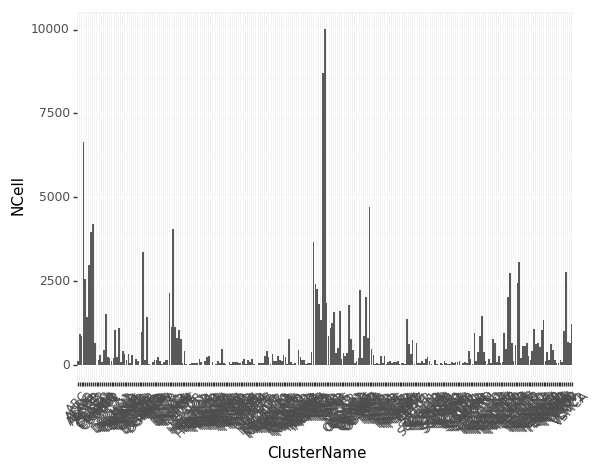

<ggplot: (8752452074749)>

In [61]:
ggplot(df_ca, aes(x='ClusterName', y='NCell')) + geom_col() + theme(axis_text_x=element_text(angle=45))

### Enrichment layer: create df and export

In [62]:
ds.layers["enrichment"][1:5, :].shape
ds.layers["enrichment"][:,:].shape

(27998, 265)

In [6]:
### make dfs
df_enrich_val = pd.DataFrame(data=ds.layers["enrichment"][:,:], columns=ds.ca["ClusterName"], index=ds.ra["Accession"]) # or index=ds.ra["Accession"] to get Ensembl ID
df_enrich_q = pd.DataFrame(data=ds.layers["enrichment_q"][:,:], columns=ds.ca["ClusterName"], index=ds.ra["Accession"])
df_enrich_val.index.name = "gene"
df_enrich_q.index.name = "gene"

In [7]:
### Export
df_enrich_val.to_csv("mousebrain-agg_L5.enrichment_values.csv.gz", compression="gzip")
df_enrich_q.to_csv("mousebrain-agg_L5.enrichment_q.csv.gz", compression="gzip")

### Enrichment layer: inspect and summarize

In [212]:
df_enrich_val.head(10)

,ENT9,ENT8,ENT6,ENT5,ENT4,ENT7,ENT3,ENT2,ENT1,ENTG1,...,PSPEP8,PSNF2,PSNF3,PSNF1,PSNP1,PSNP3,PSNP2,PSNP5,PSNP4,PSNP6
Cbln2,942.361034,7.897839,1.725855,0.862498,0.370434,0.057526,0.100657,0.195822,0.803193,0.143708,...,0.057527,84.213976,2.683104,165.787303,5.233028,0.057419,0.057507,0.136813,0.057519,0.108690
Ptchd2,36.283322,0.216117,0.216091,0.215915,0.216044,1.208592,0.216044,0.457242,0.216220,0.216035,...,3.019325,4.683088,4.545389,4.462801,0.215886,0.306889,3.932603,0.514309,0.216182,0.408624
P2rx2,3601.674248,330.848998,13.637091,85.767785,55.608005,303.071532,295.174508,328.858368,446.099009,0.540774,...,1.960357,0.315851,0.315889,0.315879,0.721053,0.448548,0.315830,22.248593,1.244313,444.253910
Ptger4,308.729127,10.455240,31.938721,16.094493,19.189401,25.958315,7.430647,29.106607,20.638741,0.555252,...,0.555470,16.484097,24.913503,5.314398,4.179587,3.877541,5.166472,8.955591,23.569992,23.108129
Fam19a1,179.321879,178.541005,67.266776,26.882989,14.330682,27.650360,0.310625,0.213207,38.622352,0.018097,...,0.018119,0.884198,4.931883,0.288425,0.033093,0.042415,0.018112,0.043087,0.018117,0.034228
Slc12a7,453.210751,24.272395,2.662857,3.531491,1.995607,34.995372,1.607959,5.295589,4.981310,4.643287,...,60.758778,3.412744,28.135159,39.145251,105.408018,2.485933,0.970621,0.848712,0.356691,0.674351
Tlx2,996.489910,344.871865,72.529916,55.777713,27.763564,195.219501,30.072995,56.240696,129.279412,0.300848,...,215.283742,145.635530,241.825833,120.452236,398.368644,842.498784,458.427977,463.566852,770.900446,475.056827
Hoxa3,195.815962,68.289689,121.580066,90.818332,85.720299,41.478952,56.854629,91.508046,43.653589,6.108701,...,2.910829,1.518865,0.468999,0.468988,4.819156,5.351931,3.436169,1.116003,0.468976,1.358862
Adgrg6,2139.999261,2.491068,4.522300,0.718826,41.660125,32.018698,13.369845,17.163447,6.151123,50.278072,...,0.087222,0.531270,0.087220,0.087216,0.891768,0.561911,1.174469,0.703578,0.343504,0.989288
Dgkg,287.406296,50.696640,0.079710,0.138939,0.102828,2.756547,3.970447,10.587617,17.311267,0.099417,...,0.246960,1.333835,1.089207,0.039799,0.055712,16.614024,26.067444,17.402795,10.385440,4.448691


In [173]:
df_enrich_val.describe()

,ENT9,ENT8,ENT6,ENT5,ENT4,ENT7,ENT3,ENT2,ENT1,ENTG1,...,PSPEP8,PSNF2,PSNF3,PSNF1,PSNP1,PSNP3,PSNP2,PSNP5,PSNP4,PSNP6
count,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,...,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000
mean,6.644436,5.554108,3.453093,2.318940,2.657254,4.397457,3.125233,4.871939,5.249645,5.391569,...,3.083198,3.560267,4.496448,4.182140,5.911765,8.526414,7.425397,6.126660,7.617265,9.504981
std,53.161371,50.760782,20.527020,12.520953,10.204893,26.413880,16.961775,28.366359,170.151902,56.631479,...,13.571577,19.211954,25.013275,23.772589,62.453955,80.910852,61.979905,41.965324,66.770515,88.775575
min,0.000471,0.000471,0.000471,0.000470,0.000471,0.000471,0.000617,0.000471,0.000471,0.000471,...,0.000471,0.000471,0.000471,0.000471,0.000470,0.000849,0.000471,0.000471,0.000471,0.000471
25%,0.991844,0.987148,0.976736,0.921197,0.970681,0.960496,0.980497,0.988486,0.902244,0.886014,...,0.886351,0.919002,0.894353,0.879399,0.965553,0.970902,0.941910,0.953601,0.921592,0.968744
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999316,1.000000,1.000000,0.999316,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.110449,4.382654,2.592420,1.508138,2.091048,3.401213,2.436482,3.910253,3.162514,1.694617,...,2.254990,2.375691,2.676774,2.286244,2.792420,3.626118,3.416571,3.105862,3.476707,4.371969
max,3601.674248,6017.553525,1759.036108,796.414190,640.971011,2469.531811,1972.107176,2629.280452,28309.381022,2751.672135,...,941.227165,1254.887595,1429.285708,1569.371698,6281.994794,5632.370579,5237.465698,2725.161493,7557.565681,9045.211730


In [115]:
df_enrich_q.head()

,ENT9,ENT8,ENT6,ENT5,ENT4,ENT7,ENT3,ENT2,ENT1,ENTG1,...,PSPEP8,PSNF2,PSNF3,PSNF1,PSNP1,PSNP3,PSNP2,PSNP5,PSNP4,PSNP6
ENSMUSG00000024647,0.0,0.000739,0.095591,1.0,1.0,1.000000,1.000000,1.0,0.820403,1.0,...,1.000000,0.000000,0.331283,0.000000,0.000625,1.000000,1.000000,1.0,1.000000,1.0
ENSMUSG00000041544,0.0,1.000000,1.000000,1.0,1.0,0.435767,1.000000,1.0,0.941720,1.0,...,0.222279,0.011730,0.106530,0.041232,1.000000,1.000000,0.026164,1.0,1.000000,1.0
ENSMUSG00000029503,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.365756,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.414041,0.0
ENSMUSG00000039942,0.0,0.000560,0.000000,0.0,0.0,0.000947,0.004072,0.0,0.020885,1.0,...,0.968476,0.000000,0.002024,0.025399,0.000656,0.001444,0.008402,0.0,0.001321,0.0
ENSMUSG00000059187,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.0,0.004773,1.0,...,1.000000,0.872528,0.084832,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0


In [184]:
### Summarize df_enrich_q and df_enrich_val
df_enrich_q_summary = pd.DataFrame({'n_fdr_genes_leq_0.1':df_enrich_q.agg(lambda x: sum(x<=0.1), axis=0), # for each cell, count the number of genes with q_value <= 0.05
                                    'n_fdr_genes_leq_0.05':df_enrich_q.agg(lambda x: sum(x<=0.05), axis=0),
                                    'n_fdr_genes_eq_0':df_enrich_q.agg(lambda x: sum(x==0), axis=0),
                                   'n_fdr_genes_eq_1':df_enrich_q.agg(lambda x: sum(x==1), axis=0)
                                   } 
                                  ) 
### df_enrich_val
df_enrich_summary_tmp_val = pd.DataFrame({'n_genes_enrich_val_leq_1':df_enrich_val.agg(lambda x: sum(x<=1), axis=0)}) 

### join on indexes (ClusterName)
df_enrich_summary = df_enrich_q_summary.join(df_enrich_summary_tmp_val)
df_enrich_summary.head()

,n_fdr_genes_eq_0,n_fdr_genes_eq_1,n_fdr_genes_leq_0.05,n_fdr_genes_leq_0.1,n_genes_enrich_val_leq_1
ENT9,904,2351,10792,11297,14659
ENT8,718,1670,9909,10825,15329
ENT6,1088,1838,8730,9776,16076
ENT5,402,18190,4653,5486,17906
ENT4,1027,2647,7089,8251,16457


In [186]:
### Join cell meta data
df_enrich_summary_meta = df_ca.join(df_enrich_summary)
df_enrich_summary_meta.head()

,ClusterName,Description,NCell,n_fdr_genes_eq_0,n_fdr_genes_eq_1,n_fdr_genes_leq_0.05,n_fdr_genes_leq_0.1,n_genes_enrich_val_leq_1
ENT9,ENT9,Cholinergic enteric neurons,169,904,2351,10792,11297,14659
ENT8,ENT8,"Cholinergic enteric neurons, VGLUT2",97,718,1670,9909,10825,15329
ENT6,ENT6,Cholinergic enteric neurons,118,1088,1838,8730,9776,16076
ENT5,ENT5,Cholinergic enteric neurons,259,402,18190,4653,5486,17906
ENT4,ENT4,Cholinergic enteric neurons,155,1027,2647,7089,8251,16457


In [206]:
df_enrich_summary_meta.describe()

,NCell,n_fdr_genes_eq_0,n_fdr_genes_eq_1,n_fdr_genes_leq_0.05,n_fdr_genes_leq_0.1,n_genes_enrich_val_leq_1
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,606.777358,599.418868,14365.286792,3291.098113,3825.558491,20723.075472
std,1170.877736,892.702996,10142.276273,3080.492983,3304.068197,3337.865015
min,7.000000,1.000000,0.000000,3.000000,11.000000,14659.000000
25%,71.000000,75.000000,4993.000000,549.000000,851.000000,17853.000000
50%,167.000000,225.000000,9879.000000,2193.000000,2852.000000,20501.000000
75%,654.000000,625.000000,25042.000000,5663.000000,6734.000000,23301.000000
max,10011.000000,5252.000000,27921.000000,10792.000000,11297.000000,27409.000000


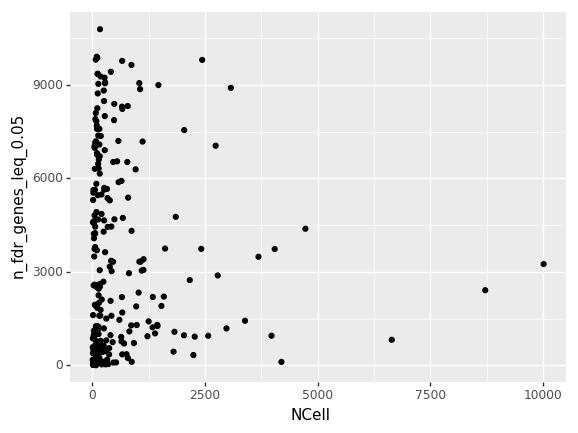

<ggplot: (8752280463673)>

In [188]:
ggplot(df_enrich_summary_meta, aes(x='NCell', y="n_fdr_genes_leq_0.05")) + geom_point()

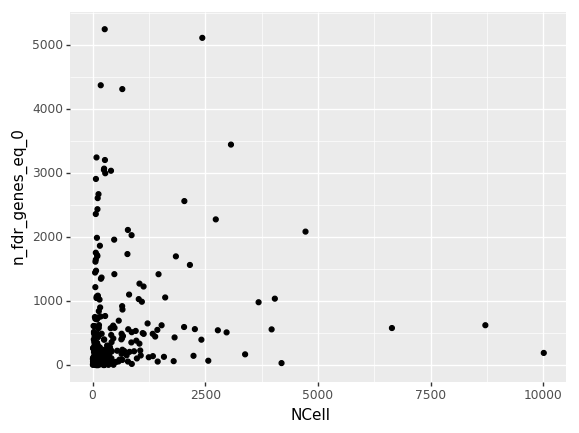

<ggplot: (-9223363284573750889)>

In [207]:
ggplot(df_enrich_summary_meta, aes(x='NCell', y="n_fdr_genes_eq_0")) + geom_point()

### plot: enrichment_value v q (fdr)

In [124]:
### Concat: 'rowbind' (column names are matched, so we don't have to worry about this)
df_enrich_concat = pd.concat([df_enrich_val, df_enrich_q], 
                             keys=['enrich_val', 'enrich_q'], 
                             names=['value_type', 'Accession']) # 'names' arg it set for convenience to avoid doing 'df_enrich_concat.index.names = [xxx, ...]'
df_enrich_concat.reset_index(inplace=True) # free Multi-index to columns

In [125]:
# df_enrich_concat.sort_values(by="Accession")
#df_enrich_concat.head()
# df_enrich_concat.tail()
#df_enrich_concat.describe()

In [126]:
df_enrich_concat_melt = df_enrich_concat.melt(id_vars=["value_type", "Accession"], var_name="ClusterName")
df_enrich_concat_melt.head()

,value_type,Accession,ClusterName,value
0,enrich_val,ENSMUSG00000024647,ENT9,942.361034
1,enrich_val,ENSMUSG00000041544,ENT9,36.283322
2,enrich_val,ENSMUSG00000029503,ENT9,3601.674248
3,enrich_val,ENSMUSG00000039942,ENT9,308.729127
4,enrich_val,ENSMUSG00000059187,ENT9,179.321879


In [70]:
# df_x = df_enrich_concat_melt >> spread('value_type', 'value') # super-slow = 2m 49s
# result is nice though
# 	Accession	ClusterName	enrich_q	enrich_val
# 0	ENSMUSG00000000001	ABC	0.055294	2.626374
# 1	ENSMUSG00000000001	ACBG	1.000000	0.787547
# 2	ENSMUSG00000000001	ACMB	1.000000	0.773508
# 3	ENSMUSG00000000001	ACNT1	1.000000	0.205454
# 4	ENSMUSG00000000001	ACNT2	1.000000	0.398013

In [157]:
### tidyr:'spread'-like function
# REF: https://stackoverflow.com/questions/43973999/how-to-spread-a-column-in-a-pandas-data-frame
df_enrich_concat_melt_spread = df_enrich_concat_melt.set_index(['value_type','ClusterName','Accession']).unstack('value_type') #16.9s

#### ALTERNATIVE: groupby summarize
# See here:https://stackoverflow.com/questions/38127209/how-to-use-groupby-to-concatenate-strings-in-python-pandas
# 

### Pivot
# df_enrich_concat_melt_spread = df_enrich_concat_melt.pivot(index='ClusterName', columns='value_type', values='value') # FAILS
# df_enrich_concat_melt_spread = df_enrich_concat_melt.pivot(columns='value_type', values='value') #  FAILS

# df_enrich_concat_melt_spread = df_enrich_concat_melt.pivot(columns='value_type', values='value') # does NOT fail, but does not work
# value_type	enrich_q	enrich_val
# 0	NaN	0.0
# 1	NaN	0.0
# 2	NaN	0.0
# 3	NaN	0.0
# 4	NaN	0.0

### 'Second' melting --> does also not work.
# df_enrich_concat_melt_spread = df_enrich_concat_melt.melt(id_vars=["Accession", "ClusterName"], value_vars=["value_type", "value"])
# print(df_enrich_concat_melt_spread.shape)
# df_enrich_concat_melt_spread.head()

print(df_enrich_concat_melt_spread.shape)
df_enrich_concat_melt_spread.head()

(7419470, 2)


value           
value_type                      enrich_q enrich_val
ClusterName Accession                              
ABC         ENSMUSG00000000001  0.055294   2.626374
            ENSMUSG00000000003  0.982410   1.000000
            ENSMUSG00000000028  0.200561   1.855631
            ENSMUSG00000000031  0.000000  26.753307
            ENSMUSG00000000037  0.460542   1.463931

In [158]:
### The index of df_enrich_concat_melt_spread is a MultiIndex.
### print(type(df_enrich_concat_melt_spread.index)) # --> MultiIndex
### print(df_enrich_concat_melt_spread.index.names) # --> ['ClusterName', 'Accession']

### reset index to make columns available
df_enrich_concat_melt_spread.reset_index(inplace=True)
# ---> now the columns are a MultiIndex
# ***ANNOYING***: this column names we want to used is partitioned into two different 'levels' of the MultiIndex
# df_enrich_concat_melt_spread.columns.get_level_values(0): Index(['ClusterName', 'Accession', 'value', 'value'], dtype='object')
# df_enrich_concat_melt_spread.columns.get_level_values(1): Index(['', '', 'enrich_q', 'enrich_val'], dtype='object', name='value_type')

### flatten a hierarchical index in columns
# *UPDATE*: you can disregard this step because we only get 'one level' of the column names.
df_enrich_concat_melt_spread.columns = df_enrich_concat_melt_spread.columns.get_level_values(1) # REF: https://stackoverflow.com/questions/14507794/python-pandas-how-to-flatten-a-hierarchical-index-in-columns

df_enrich_concat_melt_spread.columns.name = "" # removing value_type - NOT necessary

In [165]:
### ***HACKY*** way of setting column names, but it is the only practical way I found.
df_enrich_concat_melt_spread.columns = ['ClusterName', 'Accession', 'enrich_q', 'enrich_val']

In [166]:
df_enrich_concat_melt_spread.head()

,ClusterName,Accession,enrich_q,enrich_val
0,ABC,ENSMUSG00000000001,0.055294,2.626374
1,ABC,ENSMUSG00000000003,0.982410,1.000000
2,ABC,ENSMUSG00000000028,0.200561,1.855631
3,ABC,ENSMUSG00000000031,0.000000,26.753307
4,ABC,ENSMUSG00000000037,0.460542,1.463931


In [189]:
### Subset/filter
CELL_TYPE_TMP_FILTER = "ENT9" # "ABC"
# df_tmp_plot = df_enrich_concat_melt_spread.loc[df_enrich_concat_melt_spread["ClusterName"]=='ABC',:] # pandas
df_tmp_plot = df_enrich_concat_melt_spread >> mask(X.ClusterName==CELL_TYPE_TMP_FILTER) # dfply 'filter' function


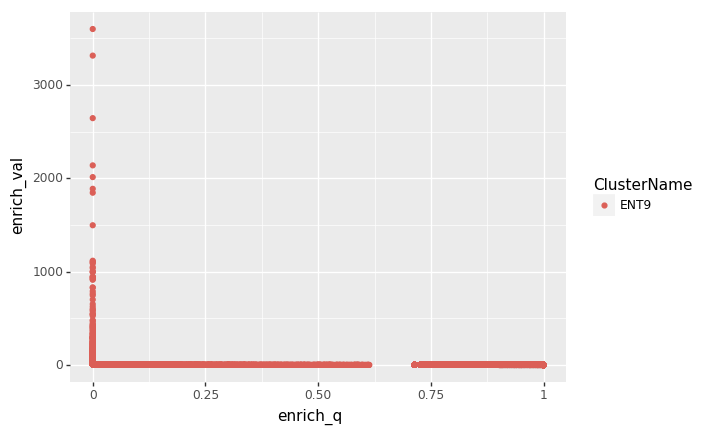

<ggplot: (-9223363284574550738)>

In [190]:
ggplot(df_tmp_plot, aes(x="enrich_q", y="enrich_val", color="ClusterName")) + geom_point() #+scale_x_log10()
# ---> CONCLUSION: only genes with a fdr value = 0, has a non-zero enrichment value

/tools/anaconda/3-4.4.0/envs/py3_anaconda3_PT180510/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 18476 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


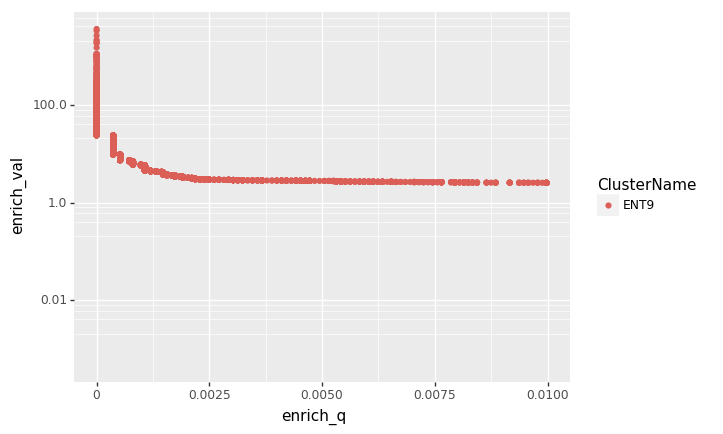

<ggplot: (-9223363284575188599)>

In [195]:
ggplot(df_tmp_plot, aes(x="enrich_q", y="enrich_val", color="ClusterName")) + geom_point() + xlim([0,0.01]) + scale_y_log10()

/tools/anaconda/3-4.4.0/envs/py3_anaconda3_PT180510/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 24259 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


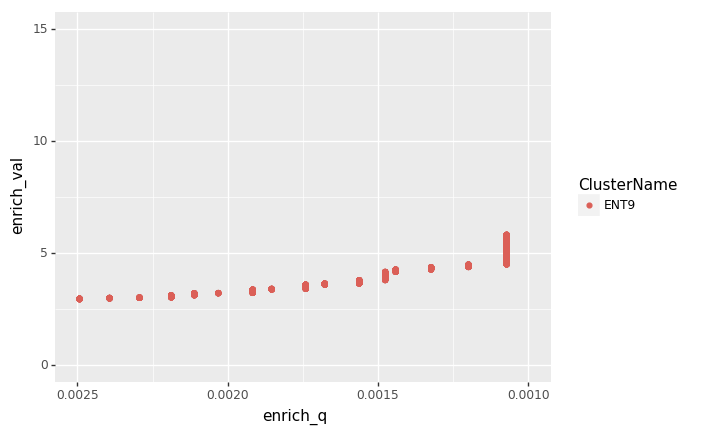

<ggplot: (-9223363284575037005)>

In [205]:
ggplot(df_tmp_plot, aes(x="enrich_q", y="enrich_val", color="ClusterName")) + geom_point() + xlim([0.0025,0.001]) + ylim([0,15])

In [ ]:
np.log10()